<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.2.1: Bagging

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

 Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset (`breast-cancer-wisconsin-data-old.csv`). The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/about) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/ohene/OneDrive/Documents/new_repo/DATA/breast-cancer-wisconsin-data-old.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()




,Sample_number,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_number                699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Cell_Size_Uniformity         699 non-null    int64 
 3   Cell_Shape_Uniformity        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [4]:
# Checking for missing values
print("Missing values per column:\n", df.isnull().sum())





Missing values per column:
 Sample_number                  0
Clump_Thickness                0
Cell_Size_Uniformity           0
Cell_Shape_Uniformity          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample_number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump_Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell_Size_Uniformity,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell_Shape_Uniformity,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bland_Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


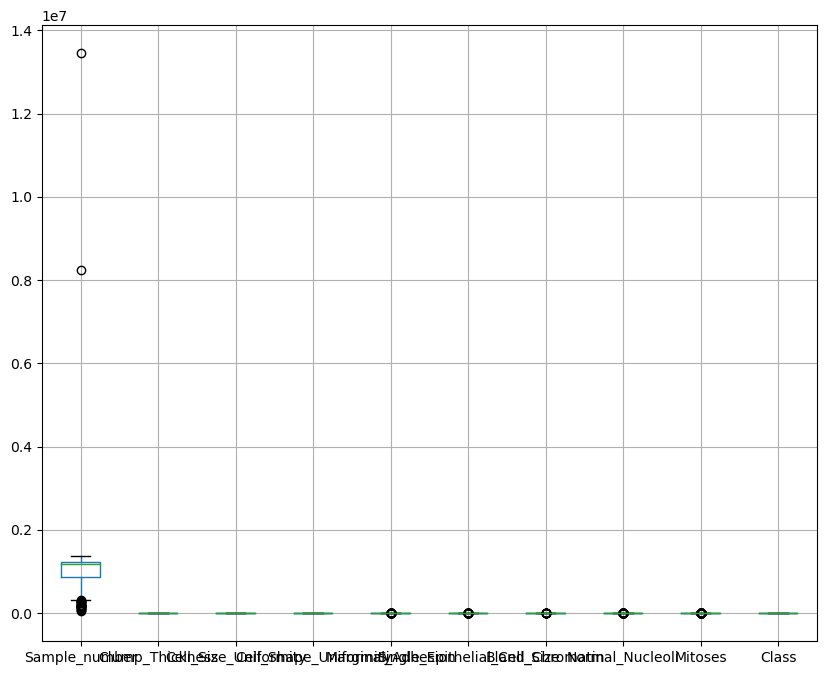

In [6]:
# Boxplot to visualize potential outliers
import matplotlib.pyplot as plt
df.boxplot(figsize=(10, 8))
plt.show()

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Feature Engineer** (if useful or necessary)

In [8]:
# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

# Check for missing values again
print("Missing values per column:\n", df.isnull().sum())

# Option 1: Drop rows with missing values
df_clean = df.dropna()

# Option 2: Impute missing values (mean, median, or another method)
# For example, you could fill missing values with the mean
# df_clean = df.fillna(df.mean())

# Convert all columns to numeric (if needed)
df_clean = df_clean.apply(pd.to_numeric)

# Define X (features) and y (target variable)
X = df_clean.drop(columns='Class')  # Assuming 'Class' is the target column
y = df_clean['Class']

# Standardize the features after cleaning
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Missing values per column:
 Sample_number                   0
Clump_Thickness                 0
Cell_Size_Uniformity            0
Cell_Shape_Uniformity           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

Input Variables

Clump Thickness
Uniformity of Cell Size
Uniformity of Cell Shape
Marginal Adhesion
Single Epithelial Cell Size
Bare Nuclei
Bland Chromatin
Normal Nucleoli
Mitoses

Yes, there is an output variable, which is the class label indicating whether the cancer is benign or malignant.

Class: This variable indicates whether the tumor is benign (coded as 2) or malignant (coded as 4).

The output variable (label) is categorical, as it represents two distinct classes:

Benign (typically represented as 2)
Malignant (typically represented as 4)

This task is a supervised learning problem.

binary classification


# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [10]:
from sklearn.model_selection import train_test_split

# Perform a stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Check the class distribution in the training and test sets
print("Training set class distribution:\n", y_train.value_counts())
print("Test set class distribution:\n", y_test.value_counts())


Training set class distribution:
 2    311
4    167
Name: Class, dtype: int64
Test set class distribution:
 2    133
4     72
Name: Class, dtype: int64


# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize a Decision Tree as the base estimator
base_estimator = DecisionTreeClassifier()

# Initialize the Bagging Classifier
bagging_model = BaggingClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

# Fit the bagging model on the training data
bagging_model.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [14]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Make predictions on the training data
y_train_pred = bagging_model.predict(X_train)
y_train_proba = bagging_model.predict_proba(X_train)[:, 1]  # Probability for class 1

# Evaluate training accuracy and ROC AUC score
train_accuracy = accuracy_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)

print("Training Accuracy:", train_accuracy)
print("Training ROC AUC:", train_roc_auc)


Training Accuracy: 1.0
Training ROC AUC: 1.0


# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [15]:
# Make predictions on the test data
y_test_pred = bagging_model.predict(X_test)
y_test_proba = bagging_model.predict_proba(X_test)[:, 1]  # Probability for class 1

# Evaluate test accuracy and ROC AUC score
test_accuracy = accuracy_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print("Test Accuracy:", test_accuracy)
print("Test ROC AUC:", test_roc_auc)


Test Accuracy: 0.9609756097560975
Test ROC AUC: 0.977234753550543


# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



